In [932]:
import matplotlib.pyplot
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

In [933]:
hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/phage-abm/phage-sde-solve/het_data_sde/hetero*')
velf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/velocity*')

In [934]:
plt.plot(np.loadtxt(hetf[0])[700:,1])
plt.plot(np.loadtxt(hetf[1])[700:,1])
plt.plot(np.loadtxt(hetf[2])[700:,1])

IndexError: list index out of range

In [873]:
hetf

['/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/phage-abm/phage-sde-solve/het_data_sde/hetero_Nb100_migr0.25+_tau50_alpha0.01_ID0_demes200_2021-02-01-08-51-52.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/phage-abm/phage-sde-solve/het_data_sde/hetero_Nb100_migr0.25+_tau50_alpha0.003_ID0_demes200_2021-02-01-08-51-11.txt',
 '/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/phage-abm/phage-sde-solve/het_data_sde/hetero_Nb100_migr0.25+_tau50_alpha0.03_ID0_demes200_2021-02-01-08-51-22.txt']

In [969]:
taus = np.array([50,100,200,500,800])
Bsims= np.array([25,50,75,100])
alphas= np.array([0.005,0.01,0.03])
samps = 100

In [970]:
harr = np.zeros((len(Bsims),len(taus),len(alphas), samps,5000 ))

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        for a, alpha in enumerate(alphas):
            for ID in range(1,samps+1):
                try:
                    hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_alpha'+str(alpha)+'_*ID'+str(ID)+'*')
                    arr = np.loadtxt(hetf[0])[:,1]
                    harr[B,t,a,ID-1,:len(arr)]=arr
                except:
                    None
        

In [937]:
hetf = glob.glob('/Users/nikhilkrishnan/Dropbox/Research/PhD/phage_ibm/het_data_sde/hetero*Nb'+str(Bsim)+'*tau'+str(tau)+'_*ID'+str(ID)+'*')
hx_arr= np.loadtxt(hetf[0])[:,0]

<ipython-input-976-5ffdf4bc1e56>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[1,i,2,:,:tf]),axis=0)
<ipython-input-976-5ffdf4bc1e56>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[1,i,2,:,:tf]),axis=0)
<ipython-input-976-5ffdf4bc1e56>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[1,i,2,:,:tf]),axis=0)
<ipython-input-976-5ffdf4bc1e56>:15: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[1,i,2,:,:tf]),axis=0)


Text(0.5, 0, 'Time (time steps)')

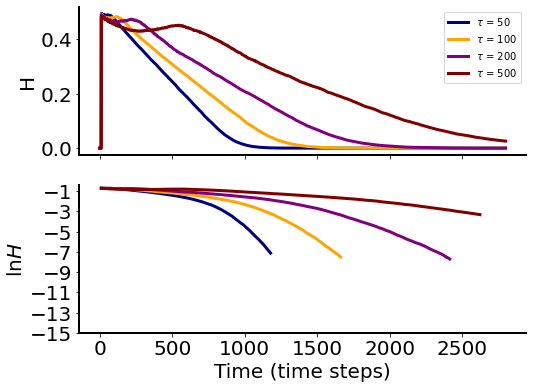

In [976]:
fig,axs = plt.subplots(2,1,figsize=(8,6),sharex=True)
colors = ['navy', 'orange', 'purple', 'maroon','grey']
ax=axs[0]
tf=2800
for i in range(4):
    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.plot(np.arange(0,tf*1,1),np.mean(harr[1,i,2,:,:tf],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
ax.legend()
ax.set_ylabel('H',fontsize=20)
ax=axs[1]

for i in range(4):
    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    y=np.mean(np.log(harr[1,i,2,:,:tf]),axis=0)
    ax.plot(np.arange(0,tf*1,1)[:len(y)],y,lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.set_yticks(np.arange(-15,0,2))
    
for ax in axs:

    for axis in ['left','bottom']:
        ax.spines[axis].set_linewidth(2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    #ax.legend()
ax.set_ylabel('$\ln H$',fontsize=20)
ax.set_xlabel('Time (time steps)',fontsize=20)

<ipython-input-981-100136cd1043>:6: RuntimeWarning: divide by zero encountered in log
  y=np.mean(np.log(harr[0,3,1,:,:10000]),axis=0)


Text(0.5, 0, 'Time (time steps)')

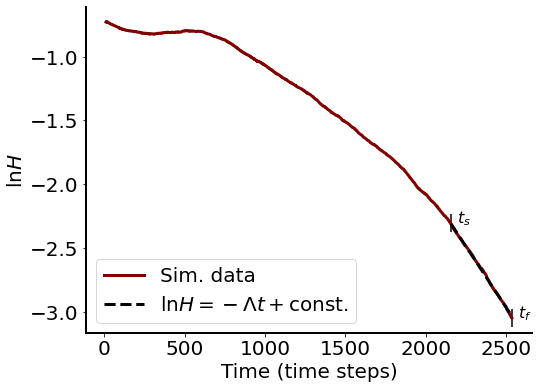

In [981]:
fig,ax = plt.subplots(1,figsize=(8,6),sharex=True)
colors = ['navy', 'orange', 'purple', 'maroon','grey']


    #ax.plot(np.mean(harr[0,i,:,:300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
y=np.mean(np.log(harr[0,3,1,:,:10000]),axis=0)
x=np.arange(0,10000*1,1)[:len(y)]
ax.plot(x,y,lw=3,c = colors[i],label=r'Sim. data')
    #ax.plot(np.mean(harr[1,i,1,:,:5\300],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
ax.legend()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

hts=np.log(0.1)
htf=np.log(0.001)
ts=np.argwhere(y>hts)[-1][0]+5
#tf=np.argwhere(y>htf)[-1][0]
tf=np.argwhere(~np.isinf(y))[-1][0]
htf=y[tf]
ax.scatter(x[ts],hts,marker='|',s=350,c='k')
ax.scatter(x[tf],htf,marker='|',s=350,c='k')
ax.text(x[ts]+40,hts,s='$t_s$',fontsize=16)
ax.text(x[tf]+40,htf,s='$t_f$',fontsize=16)
tt=ts+int((tf-ts)/2)
#ax.text(x[tt]+40,y[tt] ,s='$\ln H=-\Lambda t + \mathrm{const.} $',fontsize=16)
lam,c =np.polyfit(x[ts:tf],y[ts:tf],1)
plt.plot(x[ts:tf],lam*x[ts:tf]+c,c='k',linestyle='--',lw=3,label= "$\ln H=-\Lambda t + \mathrm{const.} $")
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)
ax.set_ylabel('$\lnH$',fontsize=20)
ax.set_xlabel('Time (time steps)',fontsize=20)

IndexError: index 1 is out of bounds for axis 2 with size 1

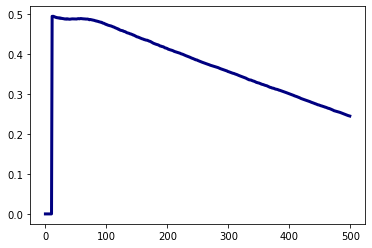

In [850]:
fig,ax = plt.subplots()
colors = ['navy', 'orange', 'purple', 'maroon','grey']
for i in range(4):
    #ax.plot(np.mean(harr[0,i,:,:500],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.plot(np.mean(harr[1,i,0,:,:500],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))
    ax.plot(np.mean(harr[1,i,1,:,:500],axis=0),lw=3,c = colors[i],label=r'$\tau$ = '+str(taus[i]))



for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Time (time steps)',fontsize=20)
ax.set_ylabel('H',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend()

In [1027]:
data= np.zeros((len(Bsims),len(taus),len(alphas)))
tss = np.array([0.03,0.03,0.05,0.1,0.08])
for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        for a, alpha in enumerate(alphas):
            #for n in rannge(samp):
            het = np.mean(np.log(harr[B,t,a,:,:]),axis=0)
            try:
                ts = np.argwhere(het>np.log(tss[t]))[-1][0]
            except:
                ts=0
            try:
                tf =np.argwhere(~np.isinf(het))[-1][0]
            except:
                tf=len(het)
            data[B,t,a] = -np.polyfit(np.arange(len(het[ts:tf])),het[ts:tf],1)[0]
            print(B,t,a,ts,tf,data[B,t,a])


            

<ipython-input-1027-cc277ccc4710>:7: RuntimeWarning: divide by zero encountered in log
  het = np.mean(np.log(harr[B,t,a,:,:]),axis=0)


0 0 0 0 5000 nan
0 0 1 885 1130 0.014218375902951878
0 0 2 903 1156 0.014242989461561823
1 0 0 0 5000 nan
1 0 1 890 1206 0.01580898038920984
1 0 2 914 1178 0.013619883407532224
2 0 0 0 5000 nan
2 0 1 901 1252 0.015489405649946431
2 0 2 926 1273 0.014780732638456764
3 0 0 0 5000 nan
3 0 1 905 1225 0.01479130643693385
3 0 2 926 1262 0.01479677760793489
0 1 0 0 5000 nan
0 1 1 1221 1656 0.009719312180453072
0 1 2 1233 1589 0.008712424118793163
1 1 0 1184 1647 0.010169846306508658
1 1 1 1193 1652 0.009691105693334737
1 1 2 1219 1661 0.009114733369025893
2 1 0 1182 1637 0.009889851027892872
2 1 1 1194 1648 0.009476998745358232
2 1 2 1241 1735 0.009209496387827509
3 1 0 1190 1715 0.010025487522289576
3 1 1 1211 1738 0.009681428007580987
3 1 2 1263 1857 0.009301553653134268
0 2 0 0 5000 nan
0 2 1 1585 2245 0.005337598079671165
0 2 2 1601 2346 0.005166769574461046
1 2 0 1519 2272 0.0058211803816938055
1 2 1 1544 2409 0.005824490999679744
1 2 2 1572 2414 0.005514436472086084
2 2 0 1515 2363 0.00

<ipython-input-1028-1b86cfee23c3>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.mean(np.log(harr[2,4,0,:,:]),axis=0))
<ipython-input-1028-1b86cfee23c3>:3: RuntimeWarning: divide by zero encountered in log
  het = np.mean(np.log(harr[3,4,0,:,:]),axis=0)


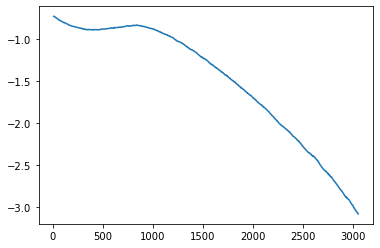

In [1028]:
plt.plot(np.mean(np.log(harr[2,4,0,:,:]),axis=0))

het = np.mean(np.log(harr[3,4,0,:,:]),axis=0)

ts = np.argwhere(het>np.log(.1))[-1][0]
tf =np.argwhere(~np.isinf(het))[-1][0]





In [1029]:
ts

2468

<ipython-input-1030-953012e382d9>:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(np.log(np.mean(harr[0,3,0],axis=0))[2426:2709])


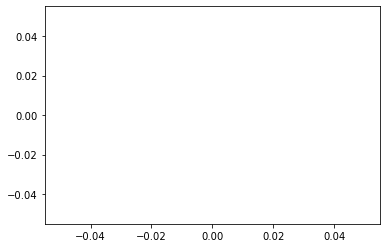

In [1030]:
plt.plot(np.log(np.mean(harr[0,3,0],axis=0))[2426:2709])

Text(0, 0.5, '$1/\\Lambda$ ')

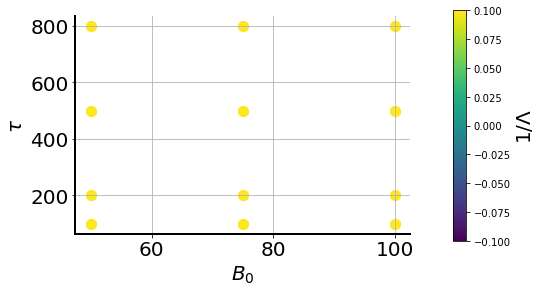

In [1031]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        #im= plt.scatter(Bsim/150,(tau*.01/Bsim)*150, c = 1/data[B,t,0],cmap=colormap,norm=normalize)
        im= ax.scatter(Bsim,(tau), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        im= ax.scatter(Bsim,(tau), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$ \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

Text(0, 0.5, '$1/\\Lambda$ ')

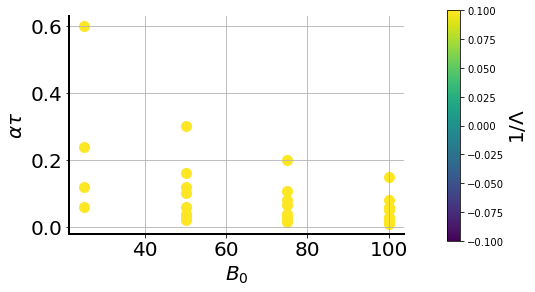

In [1032]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

Text(0, 0.5, '$1/\\Lambda$ ')

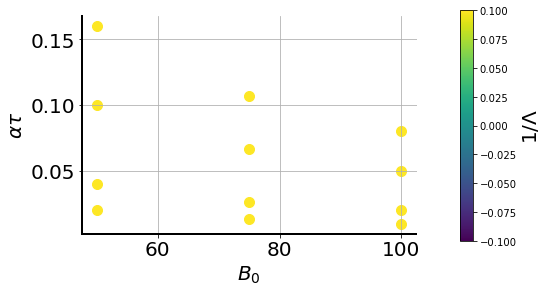

In [1033]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        #im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

Text(0, 0.5, '$1/\\Lambda$ ')

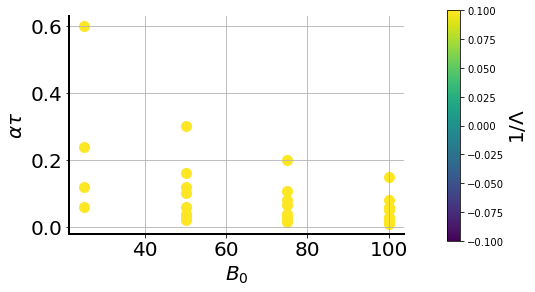

In [1034]:
fig,ax=plt.subplots()
colormap = plt.cm.viridis #or any other colormap
lmax=1/np.min(data)
lmin=1/np.max(data)
normalize = matplotlib.colors.Normalize(vmin=lmin, vmax=lmax)

for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        im= ax.scatter(Bsim,(tau*.03/Bsim), c = 1/data[B,t,1],cmap=colormap,norm=normalize,s=100)


ax.grid()

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$B_0$',fontsize=20)
ax.set_ylabel(r'$\alpha \tau$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


cbaxes = fig.add_axes([1, 0.1, 0.03, 0.8]) 
cb = plt.colorbar(im, cax = cbaxes) 
cbaxes.set_ylabel('$1/\Lambda$ ',fontsize=20)
#y_ticks=np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)
#y_ticklabes= np.arange(int(lmin/5000)*5000,(int(lmax/5000)+1)*5000,5000)/10000
#cbaxes.set_yticks([5000,10000,15000,20000,25000],fontsize=20)
#cb.set_ticks(y_ticks)
#cbaxes.set_yticklabels([str(n) for n in y_ticklabes[:-1]]+[str(y_ticklabes[-1])+r"$\times 10^4 $"],fontsize=20)

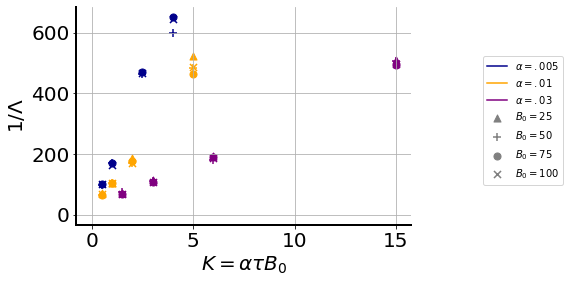

In [1057]:
fig,ax=plt.subplots()
markers=["^","+","o","x"]


ax.scatter(tau*0.005,1/data[0,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[0],
           c='grey',label=r'$B_0 = 25$')
ax.scatter(tau*0.005,1/data[0,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[1],
           c='grey',label=r'$B_0 = 50$')
ax.scatter(tau*0.005,1/data[0,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[2],
           c='grey',label=r'$B_0 = 75$')
ax.scatter(tau*0.005,1/data[0,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[3],
           c='grey',label=r'$B_0 = 100$')


ax.plot(0,0,c='darkblue',label= r'$\alpha = .005$')
ax.plot(0,0,c='orange',label= r'$\alpha = .01$')
ax.plot(0,0,c='purple',label= r'$\alpha = .03$')
for t, tau in enumerate(taus):
    for B, Bsim in enumerate(Bsims):
        #im= plt.scatter(Bsim,(tau*.01/Bsim), c = 1/data[B,t,0],cmap=colormap,norm=normalize,s=100)
        ax.scatter(tau*0.005,1/data[B,t,0],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='darkblue')
        ax.scatter(tau*0.03,1/data[B,t,2],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='purple')
        ax.scatter(tau*0.01,1/data[B,t,1],cmap=colormap,norm=normalize,s=50,marker=markers[B],c='orange')
        #plt.scatter(tau*Bsim*.01,1/data[B,t,1],cmap=colormap,norm=normalize,s=100)
        
        
        
ax.plot()
ax.grid()
ax.legend(bbox_to_anchor=(1.2,.8))

for axis in ['left','bottom']:
    ax.spines[axis].set_linewidth(2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel(r'$K = \alpha \tau B_0$',fontsize=20)
ax.set_ylabel(r'$1/ \Lambda$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)


In [1001]:
taus

array([ 50, 100, 200, 500, 800])